# Install

In [1]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cpu


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt

In [5]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import json

# Load Model

In [32]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x')

Using cache found in C:\Users\20172631/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-20 Python-3.7.9 torch-1.8.2+cpu CPU



  0%|          | 0.00/166M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
Adding AutoShape... 


In [37]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 48, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1))
  

# Make Detections With Images

In [9]:
img = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fix-cdn.brightedge.com%2Fimages%2F27094%2F27094_3063d356a3a54cc3859537fd23c5ba9d_1539205710.jpeg&f=1&nofb=1'

In [10]:
results = model(img)
results.print()

image 1/1: 800x1100 2 persons, 16 cars, 1 motorcycle, 1 truck
Speed: 326.9ms pre-process, 216.3ms inference, 6.4ms NMS per image at shape (1, 3, 480, 640)


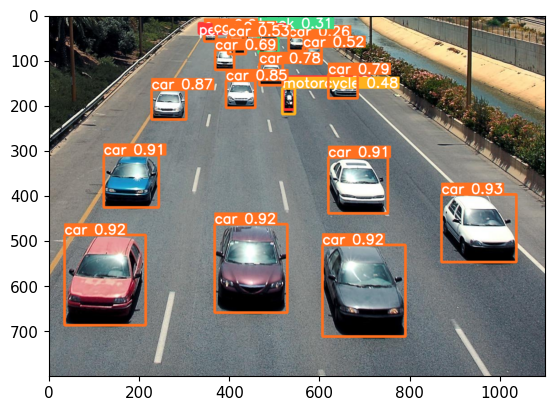

In [25]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [12]:
np.squeeze(results.render()).shape

(800, 1100, 3)

# Real Time Detections

In [31]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Train from scratch

In [1]:
import uuid
import os
import time

In [17]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['Delen', 'GedachtenParkeren', 'Presenteren', 'Prototype', 'Ontdekken']

In [15]:
!git clone https://github.com/heartexlabs/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [16]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [23]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.2-143-g63368e7 Python-3.7.9 torch-1.8.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

In [3]:
labels = [
"acteren",
"alles-mag-alles-kan",
"brainstorm",
"begrijpen",
"checkpunt",
"data-analyse",
"delen",
"de-wereld-in",
"doelgroep-leren-kennen",
"doe-maar-duurzaam",
"door-de-ogen-van",
"duiveltje",
"echt-nep",
"eindpunt",
"engeltje",
"enquete",
"experts-betrekken",
"filmen",
"gebruikerstest",
"gedachten-parkeren",
"herhaal",
"hypothese",
"inspiratie-opdoen",
"je-gevoel-volgen",
"je-zintuigen-gebruiken",
"keuzes-maken",
"kwaliteitscontrole",
"literatuur-lezen",
"maken",
"mindmap",
"moodboard",
"nabespreken",
"nieuw-leven-inblazen",
"ondernemingsplan",
"onderzoeken",
"ontdekken",
"ontwerpen",
"organiseren",
"persona",
"planning",
"presenteren",
"programma-van-eisen",
"prototype",
"reflecteren",
"samen-sterk",
"samenvatten",
"scenario",
"schetsen",
"succes-bepalen",
"tentoonstellen",
"verslag",
"vertrekpunt",
"vrije-activiteit",
"waarom-vragen-stellen"]

In [4]:
from json import loads
token_id_list = """{
  "phases": [
    { "id": 1, "name": "Begrijpen" },
    { "id": 2, "name": "Ontdekken" },
    { "id": 3, "name": "Ontwerpen" },
    { "id": 4, "name": "Maken" },
    { "id": 5, "name": "Delen" },
    { "id": 6, "name": "Vertrekpunt" },
    { "id": 7, "name": "Eindpunt" }
  ],
  "activities": [
    { "id": 1, "name": "Groowy" },
    { "id": 2, "name": "Herhaal" },
    { "id": 3, "name": "Checkpunt" },
    { "id": 4, "name": "Acteren" },
    { "id": 5, "name": "Alles-mag-alles-kan" },
    { "id": 6, "name": "Brainstorm" },
    { "id": 7, "name": "De-wereld-in" },
    { "id": 8, "name": "Doe-maar-duurzaam" },
    { "id": 9, "name": "Doelgroep-leren-kennen" },
    { "id": 10, "name": "Door-de-ogen-van" },
    { "id": 11, "name": "Duiveltje" },
    { "id": 12, "name": "Echt-nep" },
    { "id": 13, "name": "Engeltje" },
    { "id": 14, "name": "Enquete" },
    { "id": 15, "name": "Experts-betrekken" },
    { "id": 16, "name": "Filmen" },
    { "id": 17, "name": "Gebruikerstest" },
    { "id": 18, "name": "Gedachten-parkeren" },
    { "id": 19, "name": "Inspiratie-opdoen" },
    { "id": 20, "name": "Je-gevoel-volgen" },
    { "id": 21, "name": "Je-zintuigen-gebruiken" },
    { "id": 22, "name": "Keuzes-maken" },
    { "id": 23, "name": "Kwaliteitscontrole" },
    { "id": 24, "name": "Mindmap" },
    { "id": 25, "name": "Moodboard" },
    { "id": 26, "name": "Nabespreken" },
    { "id": 27, "name": "Nieuw-leven-inblazen" },
    { "id": 28, "name": "Ondernemingsplan" },
    { "id": 29, "name": "Onderzoeken" },
    { "id": 30, "name": "Organiseren" },
    { "id": 31, "name": "Persona" },
    { "id": 32, "name": "Planning" },
    { "id": 33, "name": "Presenteren" },
    { "id": 34, "name": "Prototype" },
    { "id": 35, "name": "Reflecteren" },
    { "id": 36, "name": "Samen-sterk" },
    { "id": 37, "name": "Samenvatten" },
    { "id": 38, "name": "Scenario" },
    { "id": 39, "name": "Schetsen" },
    { "id": 40, "name": "Succes-bepalen" },
    { "id": 41, "name": "Tentoonstellen" },
    { "id": 42, "name": "Verslag" },
    { "id": 43, "name": "Waarom-vragen-stellen" },
    { "id": 44, "name": "Blij" },
    { "id": 45, "name": "Boos" },
    { "id": 46, "name": "Content" },
    { "id": 47, "name": "Tevreden" },
    { "id": 48, "name": "Verbaasd" },
    { "id": 49, "name": "Verdrietig" },
    { "id": 50, "name": "Verward" },
    { "id": 51, "name": "Geïnteresseerd" },
    { "id": 52, "name": "Vrije-activiteit" },
    { "id": 53, "name": "Data-analyse" },
    { "id": 54, "name": "Hypothese" },
    { "id": 55, "name": "Literatuur-lezen" },
    { "id": 56, "name": "Programma-van-eisen" }
  ]
}"""

tokens = json.loads(token_id_list)
phase_tokens = tokens.get("phases")
activity_tokens = tokens.get("activities")

print(phase_tokens)
print(activity_tokens)

[{'id': 1, 'name': 'Begrijpen'}, {'id': 2, 'name': 'Ontdekken'}, {'id': 3, 'name': 'Ontwerpen'}, {'id': 4, 'name': 'Maken'}, {'id': 5, 'name': 'Delen'}, {'id': 6, 'name': 'Vertrekpunt'}, {'id': 7, 'name': 'Eindpunt'}]
[{'id': 1, 'name': 'Groowy'}, {'id': 2, 'name': 'Herhaal'}, {'id': 3, 'name': 'Checkpunt'}, {'id': 4, 'name': 'Acteren'}, {'id': 5, 'name': 'Alles-mag-alles-kan'}, {'id': 6, 'name': 'Brainstorm'}, {'id': 7, 'name': 'De-wereld-in'}, {'id': 8, 'name': 'Doe-maar-duurzaam'}, {'id': 9, 'name': 'Doelgroep-leren-kennen'}, {'id': 10, 'name': 'Door-de-ogen-van'}, {'id': 11, 'name': 'Duiveltje'}, {'id': 12, 'name': 'Echt-nep'}, {'id': 13, 'name': 'Engeltje'}, {'id': 14, 'name': 'Enquete'}, {'id': 15, 'name': 'Experts-betrekken'}, {'id': 16, 'name': 'Filmen'}, {'id': 17, 'name': 'Gebruikerstest'}, {'id': 18, 'name': 'Gedachten-parkeren'}, {'id': 19, 'name': 'Inspiratie-opdoen'}, {'id': 20, 'name': 'Je-gevoel-volgen'}, {'id': 21, 'name': 'Je-zintuigen-gebruiken'}, {'id': 22, 'name': 

# Load Custom Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='finished - l1280.pt')

Using cache found in C:\Users\20172631/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-20 Python-3.7.9 torch-1.8.2+cpu CPU

Fusing layers... 
Model summary: 267 layers, 46393683 parameters, 0 gradients, 108.6 GFLOPs
Adding AutoShape... 


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best - s640.pt')

Using cache found in C:\Users\20172631/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-20 Python-3.7.9 torch-1.8.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7120702 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


In [178]:
img = os.path.join('data', 'images','test', 'acteren_F29688C5-40B0-45CE-BE18-FE91FC71CAF9.jpeg_transposed.jpg')

In [6]:
img = os.path.join('data', 'process', 'IMG_3911.jpeg_transposed.jpg')

In [30]:
img = os.path.join('data', 'process', 'IMG_20221109_100127.jpg')

In [13]:
img = os.path.join('data', 'process', '20191010_135945.jpg')

In [10]:
img = os.path.join('data', 'process', 'IMG_20221014_170144.jpg')
print(img)

data\process\IMG_20221014_170144.jpg


In [14]:
results = model(img, size = 1280)

In [8]:
results.show()

In [8]:
array = np.array(results.pred[0])
print(array)

[[     18.908      1489.6      575.69      1962.6     0.96465          51]
 [     3419.3      1276.3      3830.9      1704.6     0.95506          13]
 [     996.88      1521.8        1260        1773     0.95154          37]
 [     2784.5       998.5      3022.6      1235.6     0.95124          32]
 [     2910.9      1134.9      3157.2      1366.9     0.94865          47]
 [     1702.6      1956.4        1960      2215.7      0.9467          40]
 [     2930.8        1360      3178.7      1597.3     0.94502          50]
 [     2316.6        1429        2563      1669.8     0.94418          18]
 [     1129.1      1670.3      1391.1      1924.4     0.94415          45]
 [     1901.3      1856.1        2153      2108.6     0.94319          30]
 [     1351.9      1735.5      1608.9      1990.7     0.94049          53]
 [     3065.9      1498.1      3308.3      1741.2     0.93975          26]
 [     2013.4      1686.3      2262.3      1932.6     0.93886          48]
 [       3277      1573.5

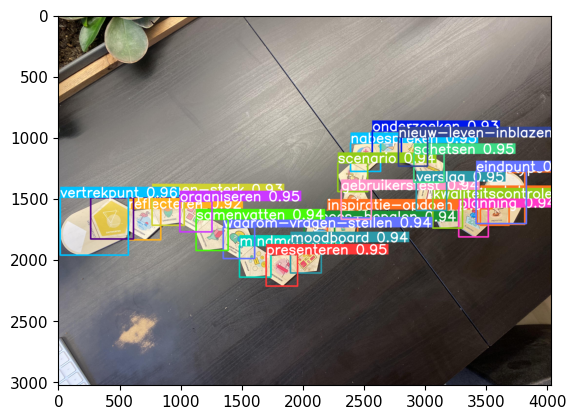

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()
#plt.savefig('./Process1.jpg')

In [15]:
# make an array with coordinates of the center point of detection
array = np.array(results.pred[0])

detections = []

for a in array:
    cX = (a[0]+a[2])/2
    cY = (a[1]+a[3])/2
    detections.append([cX, cY, a[4], a[5]])
    
print(detections)

[[3230.39990234375, 390.26275634765625, 0.9587168, 9.0], [174.1420440673828, 1368.0357666015625, 0.9555072, 14.0], [2368.22119140625, 827.874267578125, 0.955376, 1.0], [1781.0938720703125, 2302.3720703125, 0.9547643, 22.0], [2016.041748046875, 2483.55810546875, 0.95287305, 25.0], [3005.55126953125, 1382.29443359375, 0.95112693, 28.0], [2583.23779296875, 633.5545654296875, 0.9489904, 11.0], [2019.3060302734375, 838.310546875, 0.94868237, 32.0], [1623.281982421875, 1408.32568359375, 0.9481258, 26.0], [2981.751708984375, 612.376953125, 0.9460872, 3.0], [2676.20751953125, 1940.023193359375, 0.9460026, 47.0], [1763.560791015625, 1699.32177734375, 0.9451083, 24.0], [1640.5369873046875, 2010.122314453125, 0.9423736, 44.0], [2365.10888671875, 2454.7724609375, 0.9410674, 29.0], [2579.109375, 2257.6708984375, 0.9324026, 42.0], [1766.80126953125, 1054.4486083984375, 0.9282547, 6.0], [2892.576171875, 1744.979736328125, 0.79249316, 8.0], [2892.7529296875, 1744.373046875, 0.35866213, 26.0]]


In [16]:
# get coordinates VertrekPunt(index 26)
maxY = detections[0][1]
vertrekpunt = False

for index in range(len(detections)):
    det = detections[index]
    if det[3] == labels.index("vertrekpunt"):
        vertrekIndex = index
        vertrekpunt = True
        break
    else:
        if detections[index][1] > maxY:
            maxY = detections[index][1]
            vertrekIndex = index

minDistance = 10000

# array to make sure only next tokens are being looked at
doneIndexes = []
distances = []
reliability_scores = []
min_reliability = 0.5
final_ids = []
final_sign = False
first_ids = []
first_sign = False

id_token = 0
token_type = ""
eindpunt = False
oldLevel = False

# start with 'VertrekPunt'
doneIndexes.append(vertrekIndex)
distances.append(0)
newIndex = vertrekIndex
print(vertrekpunt)
# go through all tokens and check which is closest
for i in range(len(detections)):
    id_token = 0
    distance_level = 1
    # use the token that was closest to the token in the previous round
    detNew = detections[newIndex]
    for index in range(len(detections)):
        # check the token has not been used before and index not in skipIndexes:
        if index not in doneIndexes:
            det = detections[index]
            newDistance = ((detNew[0] - det[0])**2 + (detNew[1] - det[1])**2)**0.5
            #check if new distance is actually the smallest
            if newDistance < minDistance:
                if newDistance < 10:
                    multipleDetections = True
                else:
                    multipleDetections = False
                closestIndex = index
                minDistance = newDistance
                # to not repeat final loop
                new = 1
    if new == 1:
        doneIndexes.append(closestIndex)
        closestClass = detections[closestIndex][3]
        nameLabel = str(labels[int(detections[closestIndex][3])])
        reliability = str(detections[closestIndex][2])
        for token in phase_tokens:
            if token["name"].lower() == nameLabel:
                id_token = token["id"]
                token_type = "phases"
        for token in activity_tokens:
            if token["name"].lower() == nameLabel:
                id_token = token["id"]
                token_type = "activities"
        if(nameLabel == 'eindpunt'): eindpunt = True
        
        if multipleDetections and not oldLevel:
            first_ids.append(i)
        elif oldLevel and not multipleDetections:
            final_ids.append(i)
        distances.append(minDistance)
    if i == len(detections)-1:
        if oldLevel:
            final_ids.append(i)
    # start next loop with this found token
    oldLevel = multipleDetections
    newIndex = closestIndex
    minDistance = 10000
    new = 0

    
# Printen van de JSON
if vertrekpunt :
    json_tokens = '['
else:
    json_tokens = '[{"id": 6,"slug":"vertrekpunt","reliability":1.1,"type":"phases"},'

for i in range(len(doneIndexes)):
    id_token = 0
    nameLabel = str(labels[int(detections[doneIndexes[i]][3])])
    reliability = str(detections[doneIndexes[i]][2])
    for token in phase_tokens:
        # print(token["name"].lower())
        if token["name"].lower() == nameLabel:
            id_token = token["id"]
            token_type = "phases"
    for token in activity_tokens:
        if token["name"].lower() == nameLabel:
            id_token = token["id"]
            token_type = "activities"
    if(nameLabel == 'eindpunt'): eindpunt = True
    
    for final in final_ids:
        if i == final:
            final_sign = True
            break
        else:
            final_sign = False
    for first in first_ids:
        if i == first:
            first_sign = True
            break
        else:
            first_sign = False
    
    if first_sign:
        json_tokens += '{"id": 8,"slug":"onbekend","reliability":1.1,"type":"phases", "options": ['
    
    if (nameLabel == "literatuur-lezen"):
        nameLabel = "literatuur-inzetten"
    
    json_tokens += '{"id":'+str(id_token)+',"slug":"'+nameLabel+'","reliability":'+reliability+',"type":"'+token_type +'"}'
    
    if final_sign:
        json_tokens += ']}'
    
    if i != len(doneIndexes)-1: 
        json_tokens += ','
    
    print(str(id_token) + " : " + nameLabel + " : " + str(detections[doneIndexes[i]][2]) + " : " + str(distances[i]))

if eindpunt :
    json_tokens += ']'
else:
    json_tokens += ',{"id": 7,"slug":"eindpunt","reliability":1.1,"type":"phases"}]'

print(first_ids)
print(final_ids)
print(json_tokens)

False
22 : keuzes-maken : 0.95287305 : 0
19 : inspiratie-opdoen : 0.9547643 : 296.69661905984043
36 : samen-sterk : 0.9423736 : 324.29332039818746
21 : je-zintuigen-gebruiken : 0.9451083 : 334.26311514581334
23 : kwaliteitscontrole : 0.9481258 : 323.04314064570497
5 : delen : 0.9282547 : 381.8727145544338
27 : nieuw-leven-inblazen : 0.94868237 : 332.3767678953789
5 : alles-mag-alles-kan : 0.955376 : 349.0712041889146
11 : duiveltje : 0.9489904 : 289.8142259975247
1 : begrijpen : 0.9460872 : 399.0762239485538
8 : doe-maar-duurzaam : 0.9587168 : 333.40761909549354
4 : maken : 0.95112693 : 1017.1940603136396
23 : kwaliteitscontrole : 0.35866213 : 379.2418590651342
9 : doelgroep-leren-kennen : 0.79249316 : 0.6319140897407627
39 : schetsen : 0.9460026 : 291.30283872243956
34 : prototype : 0.9324026 : 332.1567615039787
24 : mindmap : 0.9410674 : 290.938541490389
13 : engeltje : 0.9555072 : 2445.6762558470205
[12]
[13]
[{"id": 6,"slug":"vertrekpunt","reliability":1.1,"type":"phases"},{"id":22

In [127]:
results.render()

[array([[[ 39,  39,  27],
         [ 37,  37,  25],
         [ 37,  35,  23],
         ...,
         [122, 125, 116],
         [124, 127, 118],
         [125, 128, 119]],
 
        [[ 42,  42,  30],
         [ 37,  37,  25],
         [ 32,  32,  20],
         ...,
         [123, 126, 117],
         [124, 127, 118],
         [125, 128, 119]],
 
        [[ 39,  41,  30],
         [ 39,  39,  29],
         [ 33,  33,  21],
         ...,
         [122, 125, 116],
         [122, 125, 116],
         [122, 125, 116]],
 
        ...,
 
        [[223, 206, 180],
         [222, 205, 179],
         [222, 205, 179],
         ...,
         [125,  99,  62],
         [126,  98,  61],
         [123,  95,  58]],
 
        [[224, 207, 181],
         [223, 206, 180],
         [222, 205, 179],
         ...,
         [126, 100,  63],
         [127,  99,  62],
         [123,  95,  58]],
 
        [[225, 208, 182],
         [224, 207, 181],
         [223, 206, 180],
         ...,
         [125,  99,  62],
  

In [8]:
np.squeeze(results.render())

array([[[ 39,  39,  27],
        [ 37,  37,  25],
        [ 37,  35,  23],
        ...,
        [122, 125, 116],
        [124, 127, 118],
        [125, 128, 119]],

       [[ 42,  42,  30],
        [ 37,  37,  25],
        [ 32,  32,  20],
        ...,
        [123, 126, 117],
        [124, 127, 118],
        [125, 128, 119]],

       [[ 39,  41,  30],
        [ 39,  39,  29],
        [ 33,  33,  21],
        ...,
        [122, 125, 116],
        [122, 125, 116],
        [122, 125, 116]],

       ...,

       [[223, 206, 180],
        [222, 205, 179],
        [222, 205, 179],
        ...,
        [125,  99,  62],
        [126,  98,  61],
        [123,  95,  58]],

       [[224, 207, 181],
        [223, 206, 180],
        [222, 205, 179],
        ...,
        [126, 100,  63],
        [127,  99,  62],
        [123,  95,  58]],

       [[225, 208, 182],
        [224, 207, 181],
        [223, 206, 180],
        ...,
        [125,  99,  62],
        [126,  98,  61],
        [123,  95,  58]]

In [13]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 3000)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 4000)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Export to ONNX

In [8]:
# Some standard imports
import io
import numpy as np

from torch import nn
import torch.utils.model_zoo as model_zoo
import torch.onnx

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='last_epoch50.pt')

Using cache found in C:\Users\20172631/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-20 Python-3.7.9 torch-1.8.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7120702 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


In [10]:
model.eval()

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [17]:
!python yolov5/export.py --weights last_epoch50.pt --img 640 --batch 1 --include torchscript onnx


export: data=D:\StudioTast\YOLOTutorial\yolov5\data\coco128.yaml, weights=['last_epoch50.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5  v6.2-143-g63368e7 Python-3.7.9 torch-1.8.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7120702 parameters, 0 gradients, 16.1 GFLOPs

PyTorch: starting from last_epoch50.pt with output shape (1, 25200, 46) (13.9 MB)

TorchScript: starting export with torch 1.8.2+cpu...
TorchScript: export success  2.6s, saved as last_epoch50.torchscript (27.6 MB)

ONNX: starting export with onnx 1.12.0...
ONNX: export success  2.7s, saved as last_epoch50.onnx (27.6 MB)

Export complete (6.2s)
Results saved to D:\StudioTast\YOLOTutorial
Detect:          python detect.py --weights last_epoch50.

In [15]:
!git config --global --add safe.directory D:/StudioTast/YOLOTutorial/yolov5

In [11]:
!python yolov5/export.py --weights last_epoch50.pt --dynamic --include onnx

export: data=D:\StudioTast\YOLOTutorial\yolov5\data\coco128.yaml, weights=['last_epoch50.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=True, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5  v6.2-143-g63368e7 Python-3.7.9 torch-1.8.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7120702 parameters, 0 gradients, 16.1 GFLOPs

PyTorch: starting from last_epoch50.pt with output shape (1, 25200, 46) (13.9 MB)

ONNX: starting export with onnx 1.12.0...
ONNX: export success  2.8s, saved as last_epoch50.onnx (27.2 MB)

Export complete (3.7s)
Results saved to D:\StudioTast\YOLOTutorial
Detect:          python detect.py --weights last_epoch50.onnx 
Validate:        python val.py --weights last_epoch50.onnx 
PyTorch Hub:     model = torch.hub.load('ultralytics/yolov5', 'custom', 'last_

In [13]:
!python yolov5/val.py --weights last_epoch50.onnx --data dataset.yaml

^C
